# General Approaches

## Util-Class

In [1]:
class CLASSINIT:
  pass
class PROCESS:
  pass
class RESULT:
  pass
class DOCUMENTATION:
  pass
class NULL:
  pass
class ERROR:
  pass
class ANIMATION:
  pass

## Util-Modules

In [2]:
import numpy as np,astropy.units as unit,matplotlib.pyplot as plt
from astropy.constants import G,kpc
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import os,shutil
plt.style.use("dark_background")
%matplotlib inline

## Util-Functions

In [3]:
CREATEDIRECTORY:PROCESS = lambda x: os.mkdir(x) if not os.path.exists(x) else None
DELETEDIRECTORY:PROCESS = lambda x: shutil.rmtree(x) if len(os.listdir(x)) > 1 else None

In [4]:
class ERRORMODULE(object):
  def __init__(self)->CLASSINIT:
    self.error = NotImplementedError(NotImplemented)
  def __str__(self)->str:
    return "Error Module - Sub/Script"
  def __call__(self)->ERROR:
    return self.error
  def __getstate__(self)->ERROR:
    raise self.error
  def __repr__(self)->DOCUMENTATION|str:
    return ERRORMODULE.__doc__
  @property
  def Default(self)->ERROR:
    raise self.error
  def Manuel(self,errorType:ERROR,errorMessage:str)->ERROR:
    raise errorType(errorMessage)

# Pre-Project Meaning Preparation

## Example

In [29]:
gravitationalConstant = 6.67e-11 # Gravitational constant

In [30]:
# Function to calculate gravitational forces
def CalculateForces(x:int or float,y:int or float,m1:int or float,m2:int or float,x1:int or float,y1:int or float,x2:int or float,y2:int or float)->tuple:
    # x, y: Current coordinates of the particle
    # m1, m2: Masses of the two masses
    # x1, y1: Coordinates of the first mass
    # x2, y2: Coordinates of the second mass
    r1 = np.sqrt((x-x1)**2+(y-y1)**2)
    r2 = np.sqrt((x-x2)**2+(y-y2)**2)
    # Update velocities based on gravitational forces
    ax = gravitationalConstant*(m1*(x1-x)/r1**3+m2*(x2-x)/r2**3)
    ay = gravitationalConstant*(m1*(y1-y)/r1**3+m2*(y2-y)/r2**3)
    return ax,ay

In [31]:
timeStep = 1 # Time step for numerical integration
stepNumber = 1000 # Number of simulation steps

In [32]:
x,y = 0,0 # initial positions of the particle
vx,vy = 1,0 # initial velocity of the particle

In [33]:
# Masses and positions of the two masses
m1,m2 = 1e10,2e10
x1,y1 = -5,0
x2,y2 = 5,0

In [34]:
# Lists to store the trajectory of the particle
trajectoryX = [x]
trajectoryY = [y]

In [35]:
# Perform the simulation
for index in range(stepNumber):
  # Calculate gravitational forces
  ax,ay = CalculateForces(x,y,m1,m2,x1,y1,x2,y2)
  # Update velocities and positions using numerical integration
  vx += ax*timeStep
  vy += ay*timeStep
  x += vx*timeStep
  y += vy*timeStep
  trajectoryX.append(x)
  trajectoryY.append(y)

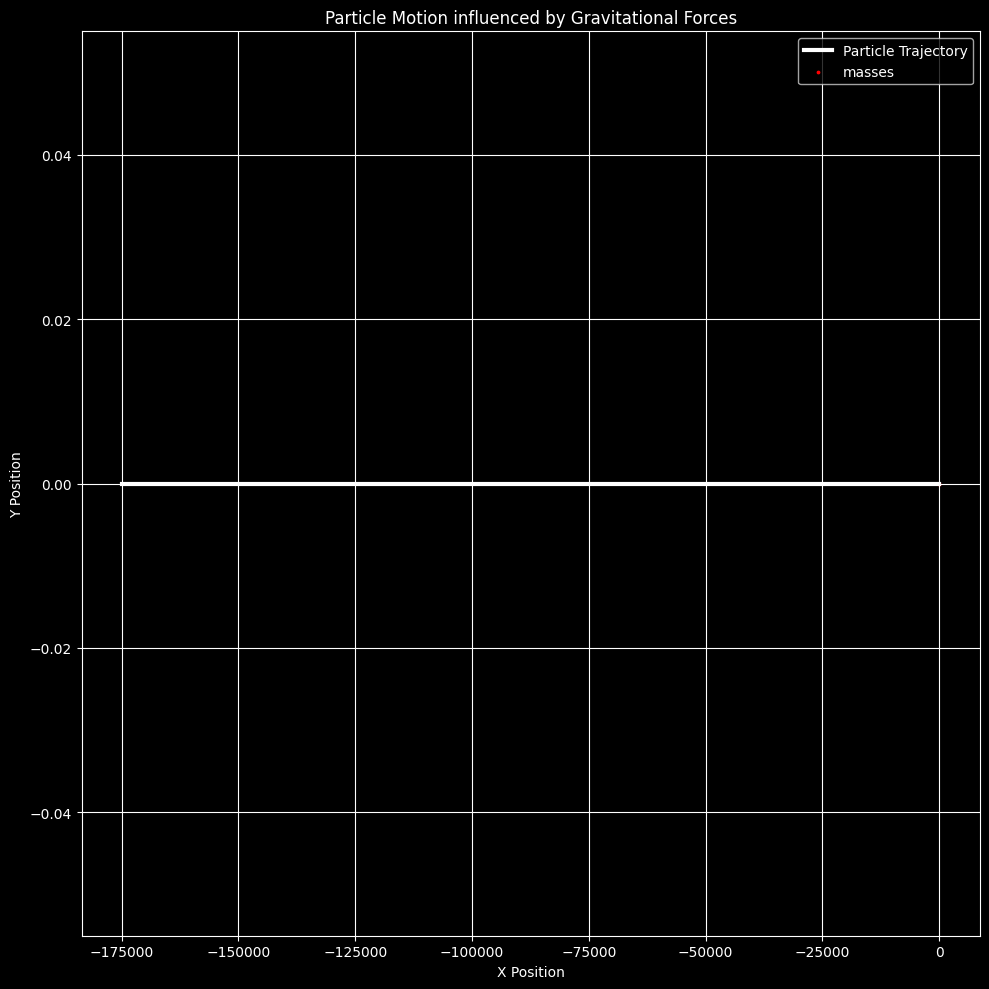

In [38]:
plt.figure(figsize=(10,10))
plt.plot(trajectoryX, trajectoryY, label='Particle Trajectory',lw=3,color="white")
plt.scatter([x1,x2],[y1,y2],color="red",marker="o",label="masses",s=3)
plt.title("Particle Motion influenced by Gravitational Forces")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Example

In [39]:
from astropy import constants

In [40]:
GValue = constants.G.value
print(f"G: {GValue}")

G: 6.6743e-11


In [41]:
# Function to calculate gravitational forces using Astropy
def CalculateForces(x:int or float,y:int or float)->tuple:
  mSun = constants.M_sun.value
  mEarth = constants.M_earth.value
  xSun,ySun = 0,0
  xEarth,yEarth = x,y
  distanceSunEarth = np.sqrt((xSun-xEarth)**2+(ySun-yEarth)**2)
  # Calculate gravitational forces
  ax = GValue*(mSun*(xSun-xEarth)/distanceSunEarth**3)
  ay = GValue*(mSun*(ySun-yEarth)/distanceSunEarth**3)
  return ax,ay

In [49]:
timeStep = 86400 # Time step in seconds (1 day)
stepNumber = 365 # Number of simulation steps (1 year)

In [50]:
x,y = constants.au.value,0 # Initial position of the Earth (1 astronomical unit from the Sun)
vx,vy = 0,29783 # Initial velocity of the Earth for a circular orbit

In [51]:
trajectoryX = [x]
trajectoryY = [y]

**The Verlet integration algorithm is a type of time-stepping algorithm that iteratively updates the positions and velocities of particles in a dynamic system. It belongs to the family of symplectic integrators, which are numerical integration methods designed to preserve certain symplectic geometric properties of Hamiltonian systems.**

In [52]:
for index in range(stepNumber):
  ax,ay = CalculateForces(x,y)
  x += vx*timeStep+0.5*ax*timeStep**2
  y += vy*timeStep+0.5*ay*timeStep**2
  # Update velocities using Verlet integration
  vx += 0.5*ax*timeStep
  vy += 0.5*ay*timeStep
  trajectoryX.append(x)
  trajectoryY.append(y)

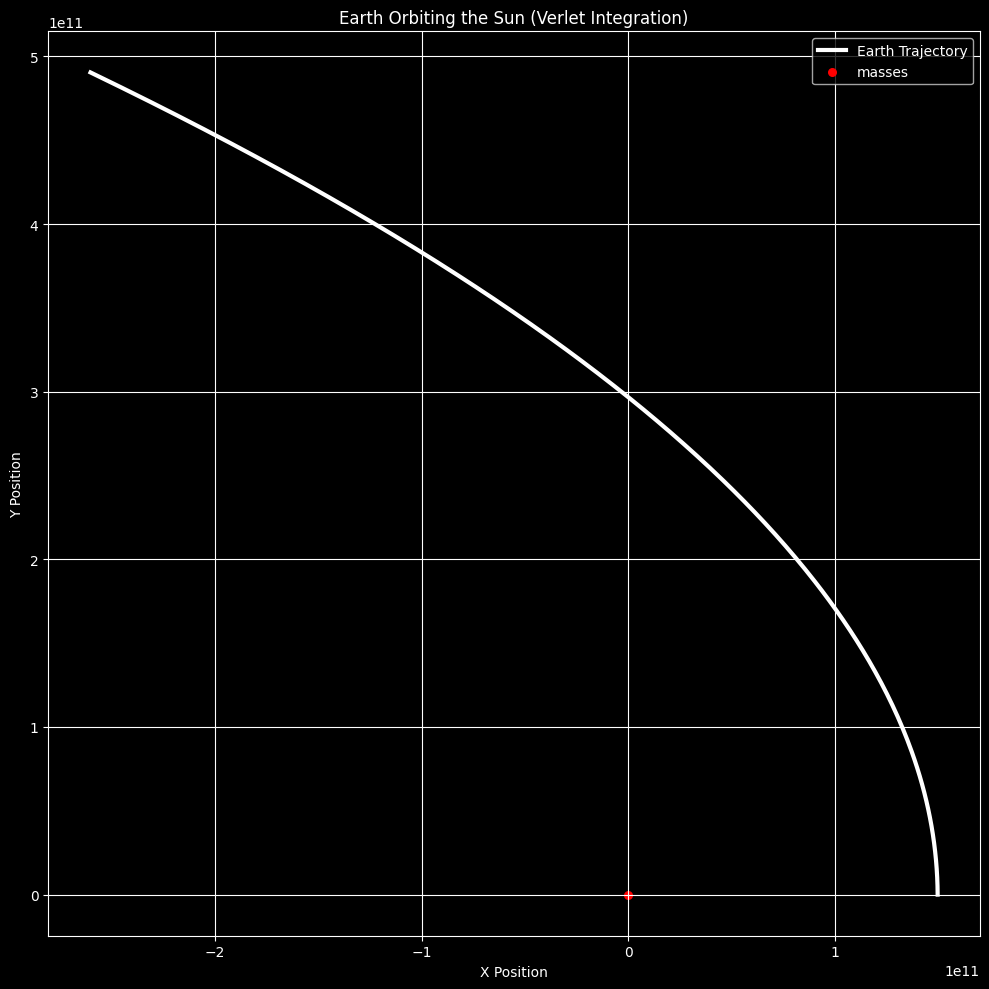

In [54]:
plt.figure(figsize=(10,10))
plt.plot(trajectoryX, trajectoryY, label='Earth Trajectory',lw=3,color="white")
plt.scatter([0],[0],color="red",marker="o",label="masses",s=30)
plt.title("Earth Orbiting the Sun (Verlet Integration)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Galaxy Parameters & Functions

## Parameters

In [5]:
def ReturnParameters(*args)->dict:
  """
  args: mass in solar masses, radius in kpc,
        position of center in kpc, velocity of center in km/s,
        normal vector of galactic plane,
        number of rings,
        number of stars,
        softening factor to limit potential at center
  """
  if len(args) != 8:
    ERRORMODULE().Manuel(ValueError,"8 ARGUMENTS - REQUIRED")
  else:
    try:
      if (len(args[2]) == 3) and (len(args[3]) == 3) and (len(args[4]) == 3):
        features = {
            "mass":args[0]*unit.M_sun, # Represents the total mass of the galaxy
            "radius":args[1]*unit.kpc, # Represents the radius or size of the galaxy
            "center_pos":args[2]*unit.kpc, # Represents the position of the center of the galaxy
            "center_vel":args[3]*unit.km/unit.s, # Represents the velocity of the center of the galaxy
            "normal":args[4], # Represents a normal vector or orientation of the galaxy
            "N_rings":args[5], # Represents the number of rings in the galaxy
            "N_stars":args[6], # Represents the number of stars in the galaxy
            "softening":args[7] # Represents a softening parameter used in simulations to avoid numerical instabilities
        }
        return features
      else:
        ERRORMODULE().Manuel(ValueError,"ARG[3]-ARG[4]-ARG[5] MUST BE TUPLE")
    except:
      ERRORMODULE().Default

## Functions

In [6]:
def InitializeGalaxyCondition(galaxy:dict,timeStep:float=0.1*unit.Myr)->None:
  ringWidth = (1-galaxy["softening"])*galaxy["radius"]/galaxy["N_rings"]
  starPerRing = int(galaxy["N_stars"]/galaxy["N_rings"])
  # rotation angle and axis
  normalize = np.sqrt(galaxy["normal"][0]**2+galaxy["normal"][1]**2+galaxy["normal"][2]**2)
  cosAngle = galaxy["normal"][2]/normalize
  sinAngle = np.sqrt(1-cosAngle**2)
  unitVector = np.cross([0,0,1],galaxy["normal"]/normalize)
  normalize = np.sqrt(unitVector[0]**2+unitVector[1]**2+unitVector[2]**2)
  if normalize > 0:
    unitVector /= normalize # unit vector
    # rotation matrix for coordinate transformation from galactic plane to observer's frame
    rotation = [
        [
            unitVector[0]*unitVector[0]*(1-cosAngle)+cosAngle,
            unitVector[0]*unitVector[1]*(1-cosAngle)-unitVector[2]*sinAngle,
            unitVector[0]*unitVector[2]*(1-cosAngle)+unitVector[1]*sinAngle
        ],
        [
            unitVector[1]*unitVector[0]*(1-cosAngle)+unitVector[2]*sinAngle,
            unitVector[1]*unitVector[1]*(1-cosAngle)+cosAngle,
            unitVector[1]*unitVector[2]*(1-cosAngle)-unitVector[0]*sinAngle
        ],
        [
            unitVector[2]*unitVector[0]*(1-cosAngle)-unitVector[1]*sinAngle,
            unitVector[2]*unitVector[1]*(1-cosAngle)+unitVector[0]*sinAngle,
            unitVector[2]*unitVector[2]*(1-cosAngle)+cosAngle
        ]
    ]
    orientationAnglePhi = np.arctan2(galaxy["normal"][1],galaxy["normal"][0])
    orientationAngleTheta = np.arccos(cosAngle)
    print(f"PLANE NORMAL (PHI): {np.degrees(orientationAnglePhi)}")
    print(f"PLANE NORMAL (THETA): {np.degrees(orientationAngleTheta)}")
  else:
    rotation = np.identity(3)
  galaxy["stars_pos"] = np.array([])
  galaxy["stars_vel"] = np.array([])
  innermostRadius = galaxy["softening"]*galaxy["radius"] # begin with innermost radius given by softening factor
  for index in range(galaxy["N_rings"]):
    # radial and angular coordinates in center-of-mass frame
    radiusStar = innermostRadius+ringWidth*np.random.random_sample(size=starPerRing)
    angleStar = 2*np.pi*np.random.random_sample(size=starPerRing)
    # Cartesian coordinates in observer's frame
    vectorObserverCoordinate = np.dot(
        rotation,
        radiusStar*[
            np.cos(angleStar),
            np.sin(angleStar),
            np.zeros(starPerRing)
        ]
    )
    x = galaxy["center_pos"][0]+vectorObserverCoordinate[0]
    y = galaxy["center_pos"][1]+vectorObserverCoordinate[1]
    z = galaxy["center_pos"][2]+vectorObserverCoordinate[2]
    orbitalPeriods = 2*np.pi*((G*galaxy["mass"])**(-1/2)*radiusStar**(3/2)).to(unit.s)
    deltaAngle = 2*np.pi*timeStep.to(unit.s).value/orbitalPeriods.value
    # velocity components in observer's frame half a step in advance (Leapfrog scheme)
    vectorObserverVelocity = np.dot(
        rotation,
        (radiusStar.to(unit.km)/timeStep.to(unit.s))*[
            (np.cos(angleStar)-np.cos(angleStar-deltaAngle)),
            (np.sin(angleStar)-np.sin(angleStar-deltaAngle)),
            np.zeros(starPerRing)
        ]
    )
    vx = galaxy["center_vel"][0]+vectorObserverVelocity[0]
    vy = galaxy["center_vel"][1]+vectorObserverVelocity[1]
    vz = galaxy["center_vel"][2]+vectorObserverVelocity[2]
    if galaxy["stars_pos"].size == 0:
      galaxy["stars_pos"] = np.array([x,y,z])
      galaxy["stars_vel"] = np.array([vx,vy,vz])
    else:
      galaxy["stars_pos"] = np.append(galaxy["stars_pos"],np.array([x,y,z]),axis=1)
      galaxy["stars_vel"] = np.append(galaxy["stars_vel"],np.array([vx,vy,vz]),axis=1)
    innermostRadius += ringWidth
  galaxy["stars_pos"] *= unit.kpc # units-design
  galaxy["stars_vel"] *= unit.km/unit.s # units-design
  galaxy["vel_scale"] = np.sqrt(G*galaxy["mass"]/(0.5*innermostRadius)).to(unit.km/unit.s) # velocity scale defined by Kepler velocity at half the disk radius

In [7]:
def EvolutionDisk(galaxy:dict,timeStep:float=0.1*unit.Myr,stepNumber:int=1000,snapshotNumber:int=100)->tuple:
  timeStepValue = timeStep.to(unit.s).value
  radiusMin = galaxy["softening"]*galaxy["radius"].to(unit.m).value
  numberStar = galaxy["N_stars"]
  # mass, position and velocity of galactic center
  mass = galaxy["mass"].to(unit.kg).value
  x,y,z = galaxy["center_pos"].to(unit.m).value
  vx,vy,vz = galaxy["center_vel"].to(unit.m/unit.s).value
  # initialize stellar coordinates
  xs = galaxy["stars_pos"][0].to(unit.m).value
  ys = galaxy["stars_pos"][1].to(unit.m).value
  zs = galaxy["stars_pos"][2].to(unit.m).value
  # intialize stellar velocities
  vxs = galaxy["stars_vel"][0].to(unit.m/unit.s).value
  vys = galaxy["stars_vel"][1].to(unit.m/unit.s).value
  vzs = galaxy["stars_vel"][2].to(unit.m/unit.s).value
  # array snapshots of all positions (centers and stars)
  snapshot = np.zeros(shape=(snapshotNumber+1,3,numberStar))
  snapshot[0] = [np.append([x],xs),np.append([y],ys),np.append([z],zs)]
  numberOfSteps = max(int(stepNumber/snapshotNumber),1)
  for index in range(1,stepNumber+1):
    radialDistance = np.maximum(np.sqrt((x-xs)**2+(y-ys)**2+(z-zs)**2),radiusMin) # radial distances from center
    # update velocities of stars (acceleration due to gravity of center)
    vxs = G.value*mass*((x-xs)/radialDistance**3)*timeStepValue
    vys = G.value*mass*((y-ys)/radialDistance**3)*timeStepValue
    vzs = G.value*mass*((z-zs)/radialDistance**3)*timeStepValue
    # update positions of stars
    xs += vxs*timeStepValue
    ys += vys*timeStepValue
    zs += vzs*timeStepValue
    # update position of center
    x += vx*timeStepValue
    y += vy*timeStepValue
    z += vz*timeStepValue
    if index % numberOfSteps == 0:
      sub = int(index/numberOfSteps)
      snapshot[sub] = [np.append([x],xs),np.append([y],ys),np.append([z],zs)]
  time = np.linspace(0*timeStep,stepNumber*timeStep,snapshotNumber+1,endpoint=True)
  snapshot *= unit.m # unit-design
  return time,snapshot.to(unit.kpc)

* The update to velocities based on gravitational forces is often derived from Newton's law of gravitation and Newton's second law of motion.


  > $\begin{align*}
  v_x &\mathrel{+}= G \cdot \left( \frac{{m_1 \cdot (x_1 - x_s)}}{{r_1^3}} + \frac{{m_2 \cdot (x_2 - x_s)}}{{r_2^3}} \right) \cdot \text{{timeStepValue}} \\
  v_y &\mathrel{+}= G \cdot \left( \frac{{m_1 \cdot (y_1 - y_s)}}{{r_1^3}} + \frac{{m_2 \cdot (y_2 - y_s)}}{{r_2^3}} \right) \cdot \text{{timeStepValue}} \\
  v_z &\mathrel{+}= G \cdot \left( \frac{{m_1 \cdot (z_1 - z_s)}}{{r_1^3}} + \frac{{m_2 \cdot (z_2 - z_s)}}{{r_2^3}} \right) \cdot \text{{timeStepValue}} \\
  \end{align*}$

In [8]:
def EvolutionTwoDisks(primary:dict,secondary:dict,timeStep:float=0.1*unit.Myr,stepNumber:int=1000,snapshotNumber:int=100)->tuple:
  timeStepValue = timeStep.to(unit.s).value
  radiusMin1 = primary["softening"]*primary["radius"].to(unit.m).value
  radiusMin2 = secondary["softening"]*secondary["radius"].to(unit.m).value
  n1,n2 = primary["N_stars"],secondary["N_stars"]
  # mass, position and velocity of primary galactic center
  m1 = primary["mass"].to(unit.kg).value
  x1,y1,z1 = primary["center_pos"].to(unit.m).value
  v1x,v1y,v1z = primary["center_vel"].to(unit.m/unit.s).value
  # mass, position and velocity of secondary galactic center
  m2 = secondary["mass"].to(unit.kg).value
  x2,y2,z2 = secondary["center_pos"].to(unit.m).value
  v2x,v2y,v2z = secondary["center_vel"].to(unit.m/unit.s).value
  # stellar coordinates of primary
  xs = primary["stars_pos"][0].to(unit.m).value
  ys = primary["stars_pos"][1].to(unit.m).value
  zs = primary["stars_pos"][2].to(unit.m).value
  # stellar coordinates of secondary
  xs = np.append(xs,secondary["stars_pos"][0].to(unit.m).value)
  ys = np.append(ys,secondary["stars_pos"][1].to(unit.m).value)
  zs = np.append(zs,secondary["stars_pos"][2].to(unit.m).value)
  # stellar velocities of primary
  vxs = primary["stars_vel"][0].to(unit.m/unit.s).value
  vys = primary["stars_vel"][1].to(unit.m/unit.s).value
  vzs = primary["stars_vel"][2].to(unit.m/unit.s).value
  # stellar velocities of secondary
  vxs = np.append(vxs,secondary["stars_vel"][0].to(unit.m/unit.s).value)
  vys = np.append(vys,secondary["stars_vel"][1].to(unit.m/unit.s).value)
  vzs = np.append(vzs,secondary["stars_vel"][2].to(unit.m/unit.s).value)
  # array snapshots of all positions (centers and stars)
  snapshot = np.zeros(shape=(snapshotNumber+1,3,n1+n2+2))
  snapshot[0] = [np.append([x1,x2],xs),np.append([y1,y2],ys),np.append([z1,z2],zs)]
  numberOfSteps = max(int(stepNumber/snapshotNumber),1)
  for index in range(1,stepNumber+1):
    # radial distances from centers with softening
    r1 = np.maximum(np.sqrt((x1-xs)**2+(y1-ys)**2+(z1-zs)**2),radiusMin1)
    r2 = np.maximum(np.sqrt((x2-xs)**2+(y2-ys)**2+(z2-zs)**2),radiusMin2)
    # update velocities of stars (acceleration due to gravity of centers)
    vxs += G.value*(m1*(x1-xs)/r1**3+m2*(x2-xs)/r2**3)*timeStepValue
    vys += G.value*(m1*(y1-ys)/r1**3+m2*(y2-ys)/r2**3)*timeStepValue
    vzs += G.value*(m1*(z1-zs)/r1**3+m2*(z2-zs)/r2**3)*timeStepValue
    # update positions of stars
    xs += vxs*timeStepValue
    ys += vys*timeStepValue
    zs += vzs*timeStepValue
    # distance between centers
    distanceMinSqrt = (radiusMin1+radiusMin2)**2
    distanceCubed = (max((x1-x2)**2+(y1-y2)**2+(z1-z2)**2,distanceMinSqrt))**(3/2)
    # gravitational acceleration of primary center
    a1x = G.value*m2*(x2-x1)/distanceCubed
    a1y = G.value*m2*(y2-y1)/distanceCubed
    a1z = G.value*m2*(z2-z1)/distanceCubed
    # update velocities of centers (constant center-of-mass velocity)
    v1x += a1x*timeStepValue
    v2x -= (m1/m2)*a1x*timeStepValue
    v1y += a1y*timeStepValue
    v2y -= (m1/m2)*a1y*timeStepValue
    v1z += a1z*timeStepValue
    v2z -= (m1/m2)*a1z*timeStepValue
    # update positions of centers
    x1 += v1x*timeStepValue
    x2 += v2x*timeStepValue
    y1 += v1y*timeStepValue
    y2 += v2y*timeStepValue
    z1 += v1z*timeStepValue
    z2 += v2z*timeStepValue
    if index % numberOfSteps == 0:
      sub = int(index/numberOfSteps)
      snapshot[sub] = [np.append([x1,x2],xs),np.append([y1,y2],ys),np.append([z1,z2],zs)]
  time = np.linspace(0*timeStep,stepNumber*timeStep,snapshotNumber+1,endpoint=True)
  snapshot *= unit.m # unit-design
  return time,snapshot.to(unit.kpc)


# Visualization Parameters & Functions

In [9]:
def ShowOrbit(stars:dict or list,data:list)->None:
  figure,axs = plt.subplots(figsize=(10,10))
  axs.set_aspect("equal")
  for star in stars:
    orbit = data[:,:,star].transpose()
    axs.plot(orbit[0],orbit[1],lw=1,label="orbit",c="white")
  axs.set_xlabel(r"$x$ [kpc]",fontsize=10)
  axs.set_ylabel(r"$y$ [kpc]",fontsize=10)

In [10]:
def AnimationOrbit(stars:dict or list,data:list,xlim:int or float,ylim:int or float,time=None,name="orbits")->ANIMATION:
  aspect = (ylim[1]-ylim[0])/(xlim[1]-xlim[0])
  figure,axs = plt.subplots(figsize=(10,1.0+10*aspect))
  axs.set_aspect("equal")
  axs.set_xlim(xlim[0],xlim[1])
  axs.set_ylim(ylim[0],ylim[1])
  axs.set_xlabel(r"$x$ [kpc]",fontsize=10)
  axs.set_ylabel(r"$y$ [kpc]",fontsize=10)
  curves = []
  for star in stars:
    curve, = ax.plot([],[],lw=1,color="green",label="curve")
    curves.append(curve)
  if time != None:
    title = axs.set_title("$t$: {:,1f}".format(time[0]))
  def Update(frame)->list:
    for c,star in enumerate(stars):
      orbit = data[:,:,star].transpose()
      curves[c].set_data(orbit[0,0:frame],orbit[1,0:frame])
    if time != None:
      title.set_text("$t$: {:,1f}".format(time[frame]))
    return curves
  animation = FuncAnimation(figure,Update,frames=len(data),interval=30,blit=True,repeat=False)
  currentPath = os.getcwd()
  CREATEDIRECTORY("videoFrames")
  savePath = os.path.join(currentPath,"videoFrames")
  saveFile = os.path.join(savePath,f"{name}.mp4")
  animation.save(saveFile)

In [11]:
def AnimationDisk2D(data:list,xlim:list,ylim:list,name:str="disk2D")->ANIMATION:
  aspect = (ylim[1]-ylim[0])/(xlim[1]-xlim[0])
  figure,axs = plt.subplots(figsize=(10,1.0+10*aspect))
  axs.set_aspect("equal")
  axs.set_xlim(xlim[0],xlim[1])
  axs.set_ylim(ylim[0],ylim[1])
  axs.set_xlabel(r"$x$ [kpc]",fontsize=10)
  axs.set_ylabel(r"$y$ [kpc]",fontsize=10)
  sct = axs.scatter(data[0,0,:],data[0,1,:],s=2,marker=".",color="red")
  def Update(frame)->CLASSINIT:
    sct.set_offsets(np.c_[data[frame,0,:],data[frame,1,:]])
    return sct,
  animation = FuncAnimation(figure,Update,frames=len(data),interval=30,blit=True,repeat=False)
  currentPath = os.getcwd()
  CREATEDIRECTORY("videoFrames2D")
  savePath = os.path.join(currentPath,"videoFrames2D")
  saveFile = os.path.join(savePath,f"{name}.mp4")
  animation.save(saveFile)


In [12]:
def ShowDisk2D(snapshot:list,n1:int or float,xlim:list,ylim:list)->None:
  n2 = snapshot.shape[1]-2-n1
  aspect = (ylim[1]-ylim[0])/(xlim[1]-xlim[0])
  figure,axs = plt.subplots(figsize=(10,1.0+10*aspect))
  axs.set_aspect("equal")
  axs.set_xlim(xlim[0],xlim[1])
  axs.set_ylim(ylim[0],ylim[1])
  axs.set_xlabel(r"$x$ [kpc]",fontsize=10)
  axs.set_ylabel(r"$y$ [kpc]",fontsize=10)
  axs.scatter(snapshot[0,0:2],snapshot[1,0:2],marker="+",color="black",s=2)
  axs.scatter(snapshot[0,2:n1+2],snapshot[1,2:n1+2],marker=".",color="blue",s=2)
  axs.scatter(snapshot[0,n1+2:n1+n2+2],snapshot[1,n1+2:n1+n2+2],marker=".",color="red",s=2)

In [13]:
def AnimationDisk3D(data:list,xlim:None=None,ylim:None=None,zlim:None=None,name:str="disk3D")->ANIMATION:
  figure = plt.figure(figsize=(10,10))
  ax = figure.add_subplot(111,projection="3d")
  ax.set_box_aspect((1,1,1))
  ax.set_xlabel(r"$x$ [kpc]",fontsize=10)
  ax.set_ylabel(r"$y$ [kpc]",fontsize=10)
  ax.set_zlabel(r"$z$ [kpc]",fontsize=10)
  if xlim != None:
    ax.set_xlim(xlim[0],xlim[1])
  if ylim != None:
    ax.set_ylim(ylim[0],ylim[1])
  if zlim != None:
    ax.set_zlim(zlim[0],zlim[1])
  sct = ax.scatter(data[0,0,1:],data[0,1,1:],data[0,2,1:],s=2,marker=".",color="red")
  def Update(frame)->CLASSINIT:
    sct._offsets3d = (data[frame,0,1:],data[frame,1,1:],data[frame,2,1:])
    return sct,
  animation = FuncAnimation(figure,Update,frames=len(data),interval=30,blit=True,repeat=False)
  currentPath = os.getcwd()
  CREATEDIRECTORY("videoFrames3D")
  savePath = os.path.join(currentPath,"videoFrames3D")
  saveFile = os.path.join(savePath,f"{name}.mp4")
  animation.save(saveFile)


In [14]:
def ShowDisk3D(snapshot:list,xlim:None=None,ylim:None=None,zlim:None=None)->None:
  figure = plt.figure(figsize=(10,10))
  ax = figure.add_subplot(111,projection="3d")
  ax.set_box_aspect((1,1,1))
  ax.set_xlabel(r"$x$ [kpc]",fontsize=10)
  ax.set_ylabel(r"$y$ [kpc]",fontsize=10)
  ax.set_zlabel(r"$z$ [kpc]",fontsize=10)
  if xlim != None:
    ax.set_xlim(xlim[0],xlim[1])
  if ylim != None:
    ax.set_ylim(ylim[0],ylim[1])
  if zlim != None:
    ax.set_zlim(zlim[0],zlim[1])
  ax.scatter(snapshot[0,1:],snapshot[1,1:],snapshot[2,1:],marker=".",color="red",s=2)

In [15]:
def ShowTwoDisks2D(snapshot:list,n1:int or float,xlim:list,ylim:list)->None:
  n2 = snapshot.shape[1]-2-n1
  aspect = (ylim[1]-ylim[0])/(xlim[1]-xlim[0])
  figure,axs = plt.subplots(figsize=(10,1.0+10*aspect))
  axs.set_aspect("equal")
  axs.set_xlim(xlim[0],xlim[1])
  axs.set_ylim(ylim[0],ylim[1])
  axs.set_xlabel(r"$x$ [kpc]",fontsize=10)
  axs.set_ylabel(r"$y$ [kpc]",fontsize=10)
  axs.scatter(snapshot[0,0:2],snapshot[1,0:2],marker="+",color="black",s=2)
  axs.scatter(snapshot[0,2:n1+2],snapshot[1,2:n1+2],marker=".",color="blue",s=2)
  axs.scatter(snapshot[0,n1+2:n1+n2+2],snapshot[1,n1+2:n1+n2+2],marker=".",color="red",s=2)

In [16]:
def ShowTwoDisk3D(snapshot:list,n1:int or float,xlim:None=None,ylim:None=None,zlim:None=None,time:None=None,name:None=None)->None:
  n2 = snapshot.shape[1]-2-n1
  figure = plt.figure(figsize=(10,10))
  ax = figure.add_subplot(111,projection="3d")
  ax.set_box_aspect((1,1,1))
  ax.set_xlabel(r"$x$ [kpc]",fontsize=10)
  ax.set_ylabel(r"$y$ [kpc]",fontsize=10)
  ax.set_zlabel(r"$z$ [kpc]",fontsize=10)
  if xlim != None:
    ax.set_xlim(xlim[0],xlim[1])
  if ylim != None:
    ax.set_ylim(ylim[0],ylim[1])
  if zlim != None:
    ax.set_zlim(zlim[0],zlim[1])
  if time != None:
    title = ax.set_title("$t$: {:,.1f}".format(time))
  ax.scatter(snapshot[0,0:2],snapshot[1,0:2],snapshot[2,0:2],marker="+",color="black",s=2)
  ax.scatter(snapshot[0,2:n1+2],snapshot[1,2:n1+2],snapshot[2,2:n1+2],marker=".",color="blue",s=2)
  ax.scatter(snapshot[0,n1+2:n1+n2+2],snapshot[1,n1+2:n1+n2+2],snapshot[2,n1+2:n1+n2+2],marker=".",color="red",s=2)
  if name != None:
    currentPath = os.getcwd()
    CREATEDIRECTORY("figureSaved")
    savePath = os.path.join(currentPath,"figureSaved")
    saveFile = os.path.join(savePath,f"{name}_{round(time.value,3)}.pdf")
    plt.savefig(saveFile)


In [17]:
def AnimationTwoDisk2D(data:list,N1:int or float,xlim:list,ylim:list,name='TwoDiskAnimation2D')->ANIMATION:
  N2 = data.shape[2]-2-N1
  aspect_ratio = (ylim[1]-ylim[0])/(xlim[1]-xlim[0])
  fig, ax = plt.subplots(figsize=(10,1.0+10*aspect_ratio))
  ax.set_aspect('equal')
  ax.set_xlim(xlim[0],xlim[1])
  ax.set_ylim(ylim[0],ylim[1])
  ax.set_xlabel(r'$x$ [kpc]',fontsize=10)
  ax.set_ylabel(r'$y$ [kpc]',fontsize=10)
  sct  = ax.scatter(data[0,0,0:2],data[0,1,0:2],marker='+',color='black',s=2)
  sct1 = ax.scatter(data[0,0,2:N1+2],data[0,1,2:N1+2],marker='.',color='blue',s=2)
  sct2 = ax.scatter(data[0,0,N1+2:N1+N2+2],data[0,1,N1+2:N1+N2+2],marker='.',color='red',s=2)
  def Update(i):
      sct.set_offsets( np.c_[data[i,0,0:2], data[i,1,0:2]])
      sct1.set_offsets(np.c_[data[i,0,2:N1+2],data[i,1,2:N1+2]])
      sct2.set_offsets(np.c_[data[i,0,N1+2:N1+N2+2],data[i,1,N1+2:N1+N2+2]])
      return sct,sct1,sct2,
  animation = FuncAnimation(fig,Update,frames=len(data),interval=30,blit=True,repeat=False)
  currentPath = os.getcwd()
  CREATEDIRECTORY("videoAnimation2D")
  savePath = os.path.join(currentPath,"videoAnimation2D")
  saveFile = os.path.join(savePath,f"{name}.mp4")
  animation.save(saveFile)

In [27]:
def AnimationTwoDisk3D(data:list,N1:int or float,xlim:None=None,ylim:None=None,zlim:None=None,time:None=None,name='TwoDiskAnimation3D')->ANIMATION:
  N2 = data.shape[2]-2-N1
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111,projection='3d')
  ax.set_box_aspect((1,1,1))
  ax.set_xlabel(r'$x$ [kpc]',fontsize=10)
  ax.set_ylabel(r'$y$ [kpc]',fontsize=10)
  ax.set_zlabel(r'$z$ [kpc]',fontsize=10)
  if xlim != None:
    ax.set_xlim(xlim[0], xlim[1])
  if ylim != None:
    ax.set_ylim(ylim[0], ylim[1])
  if zlim != None:
    ax.set_zlim(zlim[0], zlim[1])
  sct  = ax.scatter(data[0,0,0:2],data[0,1,0:2],data[0,2,0:2],marker='+',color='blue',s=3)
  sct1 = ax.scatter(data[0,0,2:N1+2],data[0,1,2:N1+2],data[0,2,2:N1+2],marker='.',color='black',s=3)
  sct2 = ax.scatter(data[0,0,N1+2:N1+N2+2],data[0,1,N1+2:N1+N2+2],data[0,2,N1+2:N1+N2+2],marker='.',color='red',s=3)
  if time != None:
      title = ax.set_title('$t$ = {:.1f}'.format(time[0].value))
  def Update(i):
      sct._offsets3d = (data[i,0,0:2],data[i,1,0:2],data[i,2,0:2])
      sct1._offsets3d = (data[i,0,2:N1+2],data[i,1,2:N1+2],data[i,2,2:N1+2])
      sct2._offsets3d = (data[i,0,N1+2:N1+N2+2],data[i,1,N1+2:N1+N2+2],data[i,2,N1+2:N1+N2+2])
      if time != None:
          title.set_text('$t$ = {:.1f}'.format(time[i].value))
      return sct,sct1,sct2,
  animation = FuncAnimation(fig,Update,frames=len(data),interval=10,blit=True)
  currentPath = os.getcwd()
  CREATEDIRECTORY("videoAnimation3D")
  savePath = os.path.join(currentPath,"videoAnimation3D")
  saveFile = os.path.join(savePath,f"{name}.mp4")
  animation.save(saveFile)

# Operations

## Galaxy Data

In [20]:
galaxies = {
    "intruder":ReturnParameters(
        1e10, # mass in solar masses
        5, # disk radius in kpc
        (25,-25,-5), # coordinates (x,y,z) of initial position in kpc
        (-75,75,0), # x-, y-, z-components of initial velocity in km/s
        (0,0,1), # normal to galactic plane (disk is in xy-plane)
        5, # number of rings (each ring will be randomly populated with 1000/5 = 200 stars)
        1000, # total number of stars
        0.025 # softening factor defines inner edge of disk
    ),
    "target": ReturnParameters(
        5e10, # mass in solar masses
        10, # disk radius in kpc
        (-5,5,1), # coordinates (x,y,z) of initial position in kpc
        (15,-15,0), # x-, y-, z-components of initial velocity in km/s
        (1,-1,2**0.5), # normal to galactic plane (disk is in xy-plane)
        10, # number of rings (each ring will be randomly populated with 1000/10 = 100 stars)
        4000, # total number of stars
        0.025 # softening factor defines inner edge of disk
    )
}

In [22]:
print(f"Galaxies Info:\n\n{galaxies['intruder']}\n{galaxies['target']}")

Galaxies Info:

{'mass': <Quantity 1.e+10 solMass>, 'radius': <Quantity 5. kpc>, 'center_pos': <Quantity [ 25., -25.,  -5.] kpc>, 'center_vel': <Quantity [-75.,  75.,   0.] km / s>, 'normal': (0, 0, 1), 'N_rings': 5, 'N_stars': 1000, 'softening': 0.025}
{'mass': <Quantity 5.e+10 solMass>, 'radius': <Quantity 10. kpc>, 'center_pos': <Quantity [-5.,  5.,  1.] kpc>, 'center_vel': <Quantity [ 15., -15.,   0.] km / s>, 'normal': (1, -1, 1.4142135623730951), 'N_rings': 10, 'N_stars': 4000, 'softening': 0.025}


## Initializing

In [23]:
InitializeGalaxyCondition(galaxies["intruder"])
InitializeGalaxyCondition(galaxies["target"])

PLANE NORMAL (PHI): -45.0
PLANE NORMAL (THETA): 45.0


In [24]:
time,data = EvolutionTwoDisks(
    galaxies["target"],
    galaxies["intruder"],
    stepNumber=10000,
    snapshotNumber=500,
    timeStep=0.05*unit.Myr
    )

## Checking Depends On Related Time

In [25]:
timeDepended = 300 # Myr

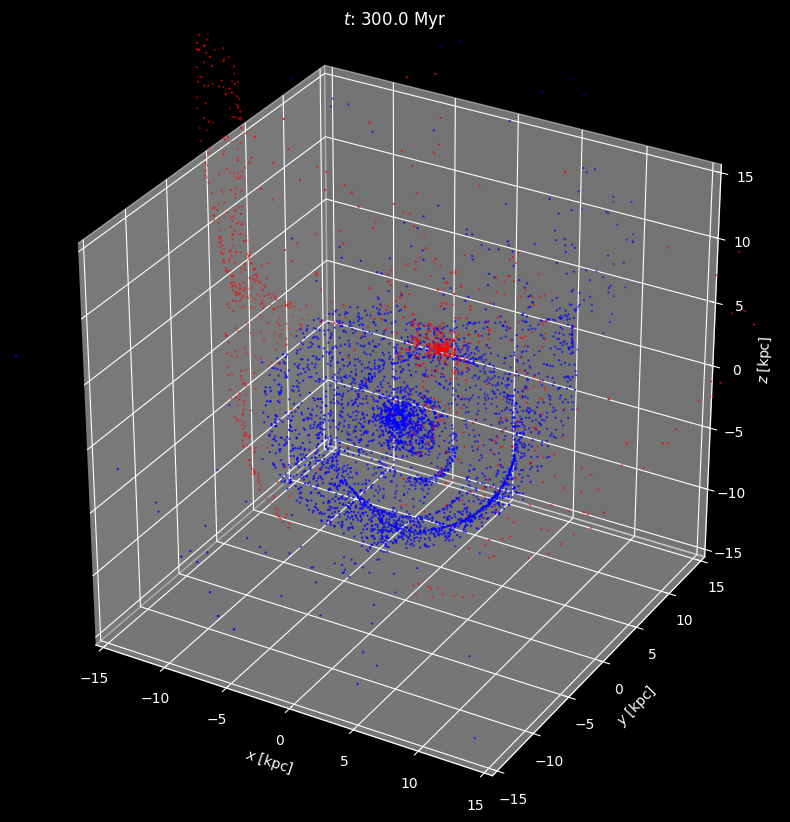

In [26]:
ShowTwoDisk3D(
    data[timeDepended,:,:],
    galaxies["target"]["N_stars"],
    [-15,15],
    [-15,15],
    [-15,15],
    time[timeDepended],
    "twoDisks"
    )

## Animation For All Periods

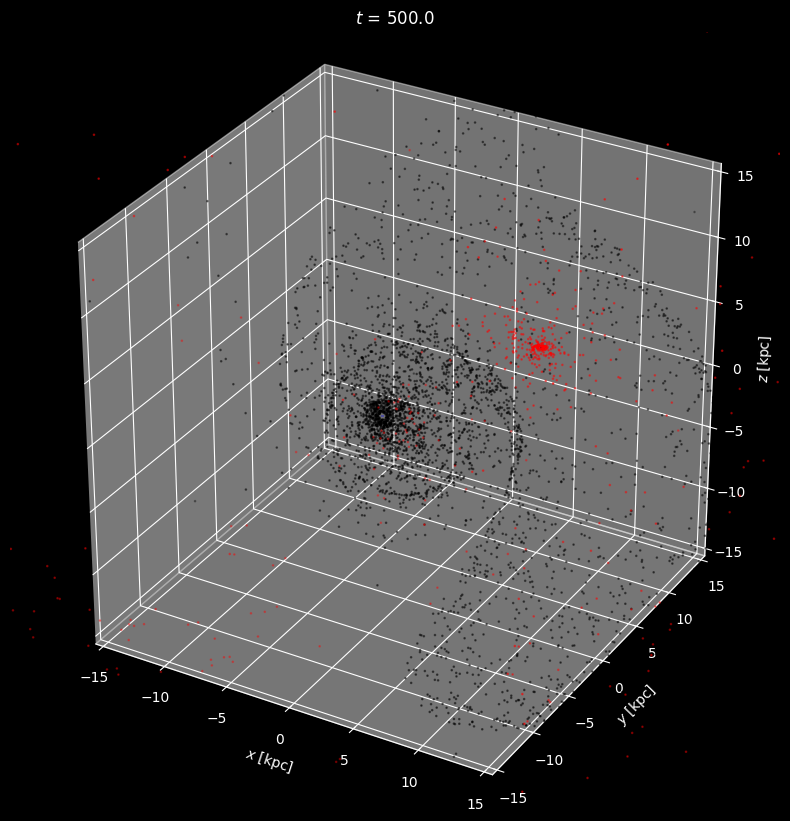

In [28]:
AnimationTwoDisk3D(
    data,
    galaxies["target"]["N_stars"],
    [-15,15],
    [-15,15],
    [-15,15],
    time)